In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [7]:
train_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
test_iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')
test_iris

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0
5,125,7.2,3.2,6.0,1.8,2
6,36,5.5,3.5,1.3,0.2,0
7,141,6.9,3.1,5.1,2.3,2
8,12,4.8,3.0,1.4,0.1,0
9,63,6.1,2.9,4.7,1.4,1


In [8]:
X_train = train_iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = train_iris['species']
X_test = test_iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = test_iris['species']

In [4]:
depth_max_range = range(1, 100)

In [5]:
scores_data = pd.DataFrame()

In [13]:
np.random.seed(0)
for max_depth in depth_max_range:

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\Artem\AppData\Local\Temp\ipykernel_15196\1856592831.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15196\1856592831.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15196\1856592831.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Artem\AppData\Local\Temp\ipykernel_15196\1856592831.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_

In [14]:
scores_data_long = pd.melt(scores_data, id_vars =['max_depth'], 
                           value_vars = ['train_score', 'test_score'], 
                           var_name = 'set_type', value_name = 'score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
391,95,test_score,0.92
392,96,test_score,0.92
393,97,test_score,0.92
394,98,test_score,0.94


<AxesSubplot:xlabel='max_depth', ylabel='score'>

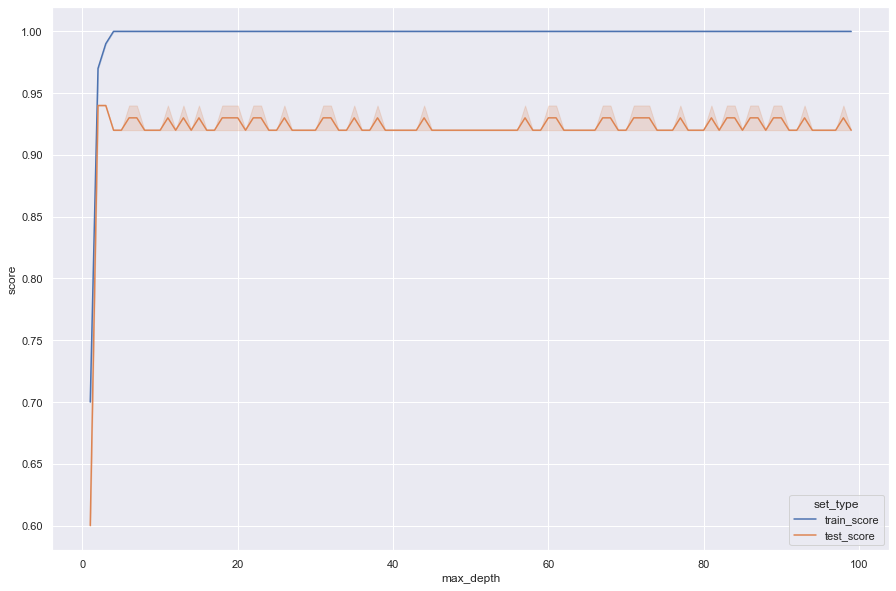

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data = scores_data_long, x = 'max_depth', y = 'score', hue = 'set_type')